# Project Summary
For your first major project of DS 1.1, you’ll investigate real-world data from feedback surveys completed during Make School’s very own Summer Academy program! Completing this project will you’ll strengthen your understanding of:
- The overall Data Science process (define, measure, analyze, improve, control)
- Aggregating datasets from multiple files, locations, and types
- The importance of scripting and automating data preprocessing
- Transforming data so that it has the same scale and data type
- Best practices for investigating data and asking interesting questions
- Data Visualization strategies
- Distilling findings down into small, understandable, non-technical (!) presentations


## Description of Problem
Clean and investigate Make School NPS data to find interesting and actionable trends that help inform decision-makers. Create a presentation in a Jupyter Notebook using data visualizations and other techniques that allow non-technical team members to understand your findings. 


## Background on NPS
Every summer, Make School welcomes hundreds of students into the Summer Academy to study software development and build cool stuff. The management wants to make sure that students continue to be satisfied with their experience as the program scales. The main way we measure this is through Net Promoter Score (NPS), which is a tool commonly used to measure customer loyalty and promotion. You’ve seen NPS before if you’ve been asked a question like:
“On a scale of 1 to 10, how likely are you to recommend [X] to a friend or colleague?”

NPS segments all responses between 1 and 10 into three categories based on their sentiment:
- Promoter (9 – 10)
- Passive (7 – 8)
- Detractor (1 – 6)

To calculate NPS, companies follow these steps:
Segment all responses into Promoter, Passive, and Detractor categories.
Calculate the percentage of responses in each category out of the total number of responses to the survey.
Subtract the Detractors percentage from the Promoters percentage. This is the NPS.

In other words, NPS can be calculated with this equation:
- NPS = (Promoters - Detractors)/(Promoters + Passives + Detractors)

NPS can range from –100 (if everyone is a detractor) to +100 (if everyone is a promoter).


## Questions to Consider Answering
In this scenario, you’ve just been given access to this data from your boss, with the instructions to “See if you can find anything in here that can help the business.” – This is a very broad set of instructions.  In order to complete this task well, you may want to consider finding answers to the following questions:

- How many more promoters are there than detractors across our 2017 data?
- Which track boasts the best promoter-to-detractor ratio?
- Does the student experience get better the longer that they are enrolled at the Summer Academy?
- Does student satisfaction vary by location?
- What are things we could find here that could “help the business”?
- What sorts of information does this dataset contain?
- What kinds of questions might we be able to answer with this data?
- What kinds of questions can’t we answer with this data?
- What sorts of information might be actionable?
- How can you present your findings in a way that non-technical employees can understand and use to make decisions?


# Midterm Project: NPS Data Analysis
DS 1.1
<br>
Alanna Noguchi

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Student Feedback Surveys-Superview.csv')
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right
1450,1497,New York City,Apps,Week 7,10,Just right
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow


In [183]:
remove_error = df[df['Rating (Num)'] == '#ERROR!'].index
df.drop(remove_error , inplace=True)

df['Rating (Num)'].dropna().value_counts()

8     392
9     384
10    376
7     177
6      59
5      35
4      13
3       8
0       2
1       2
2       2
Name: Rating (Num), dtype: int64

In [162]:
promoters = len(df[(df['Rating (Num)'] == '10') | (df['Rating (Num)'] == '9')])
print('The total number of ratings that received a 9 or 10 are called "Promotors": ' + str(promoters))

The total number of ratings that received a 9 or 10 are called "Promotors": 760


In [163]:
passives = len(df[(df['Rating (Num)'] == '8') | (df['Rating (Num)'] == '7')])
print('The total number of ratings that received a 7 or 8 are called "Passives": ' + str(passives))

The total number of ratings that received a 7 or 8 are called "Passives": 569


In [164]:
detractors = len(df[(df['Rating (Num)'] == '6') | (df['Rating (Num)'] == '5') | (df['Rating (Num)'] == '4') | (df['Rating (Num)'] == '3') | (df['Rating (Num)'] == '2') | (df['Rating (Num)'] == '1') | (df['Rating (Num)'] == '0')])
print('The total number of ratings that received a 6 and less are called "Detractors": ' + str(detractors))

The total number of ratings that received a 6 and less are called "Detractors": 121


# The total number per category of ratings:
> - Promotors (9-10): 760
> - Passives (7-8): 569
> - Detractors (0-6): 121

<br>
NPS = (promotors - detractors) / (promotors + passives + detractors)
<br>
NPS = (760 - 121) / (760 + 569 + 121) = 0.44068

In [165]:
NPS = (promoters - detractors)/(promoters + passives + detractors)
print('The Net Promotor Score (NPS) is: ' + str(NPS))

The Net Promotor Score (NPS) is: 0.4406896551724138


# Here is a plot of the scores: 

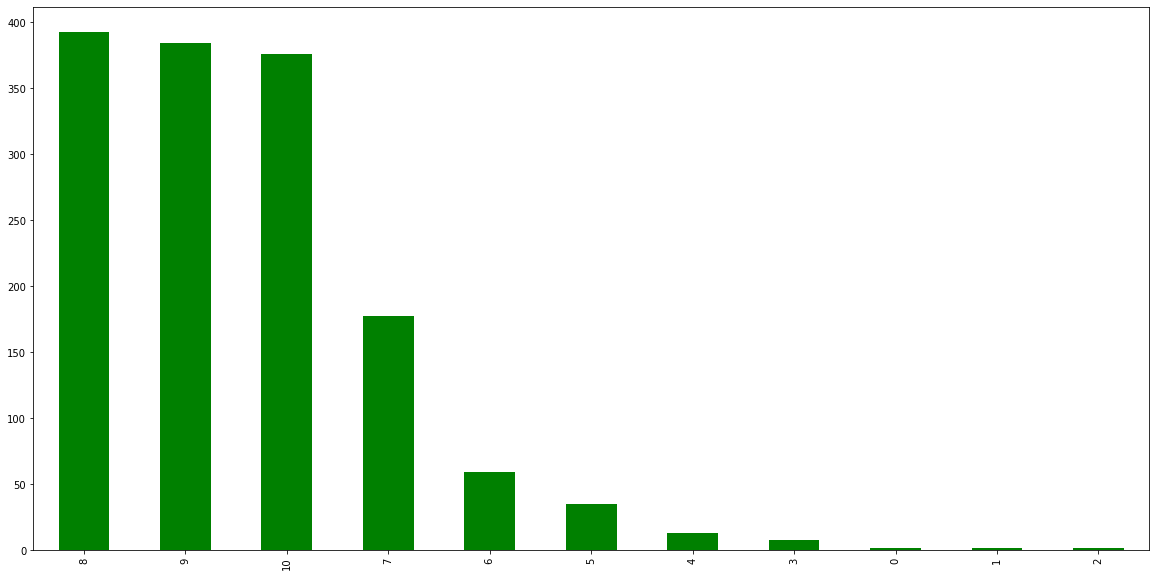

In [287]:
remove_error = df[df['Rating (Num)'] == '#ERROR!'].index
df.drop(remove_error , inplace=True)

df['Rating (Num)'].value_counts().plot(kind='bar', figsize = (20, 10), color='green')

## Let's cross examine the ratings and locations:
### By doing so, we see the number of students in various locations and how they rated the program

In [232]:
table = pd.crosstab(df['Rating (Num)'], df['Location'])
table

Location,Atlanta,Beijing,Chicago,Hong Kong,Los Angeles,New York City,Oakland,Redwood City,San Francisco,Santa Clara,Tokyo,Washington DC
Rating (Num),,,,,,,,,,,,
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,0,0
10,14,27,17,0,35,84,12,12,101,29,22,10
2,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,3,0,0,4,0,1,0
4,0,0,0,0,1,3,0,0,3,1,3,0
5,0,0,0,1,1,9,1,3,6,7,2,3
6,0,0,4,2,3,16,1,2,17,5,3,3
7,1,6,12,3,8,38,9,10,40,23,10,7


# How many students were from each location?

In [312]:
atlanta = dict(pd.crosstab(df['Track'], df['Location']))['Atlanta'].values.max()  
beijing = dict(pd.crosstab(df['Track'], df['Location']))['Beijing'].values.max() 
chicago = dict(pd.crosstab(df['Track'], df['Location']))['Chicago'].values.max() 
hk = dict(pd.crosstab(df['Track'], df['Location']))['Hong Kong'].values.max()  
la = dict(pd.crosstab(df['Track'], df['Location']))['Los Angeles'].values.max()  
nyc = dict(pd.crosstab(df['Track'], df['Location']))['New York City'].values.max()  
oakland = dict(pd.crosstab(df['Track'], df['Location']))['Oakland'].values.max() 
redwood_city = dict(pd.crosstab(df['Track'], df['Location']))['Redwood City'].values.max() 
sf = dict(pd.crosstab(df['Track'], df['Location']))['San Francisco'].values.max()  
santa_clara = dict(pd.crosstab(df['Track'], df['Location']))['Santa Clara'].values.max()  
tokyo = dict(pd.crosstab(df['Track'], df['Location']))['Tokyo'].values.max()  
wash_dc = dict(pd.crosstab(df['Track'], df['Location']))['Washington DC'].values.max() 

num_of_students = [
    atlanta,
    beijing,
    chicago,
    hk,
    la,
    nyc, 
    oakland, 
    redwood_city, 
    sf, 
    santa_clara, 
    tokyo, 
    wash_dc
]

locations = ['Atlanta', 'Beijing', 'Chicago', 'Hong Kong', 'Los Angeles', 'New York City', 'Oakland', 'Redwood City', 'San Francisco', 'Santa Clara', 'Tokyo', 'Washington DC']

student_track_location_data = pd.DataFrame(data={
        '# of Students': num_of_students,
        'Location' : locations
    })


In [311]:
student_track_location_data

,# of Students,Location
0,18,Atlanta
1,76,Beijing
2,52,Chicago
3,10,Hong Kong
4,75,Los Angeles
5,194,New York City
6,39,Oakland
7,58,Redwood City
8,155,San Francisco
9,111,Santa Clara


# How many students were in each track?

In [281]:
apps = dict(pd.crosstab(df['Week'], df['Track']))['Apps'].values.max()  
apps_explorer = dict(pd.crosstab(df['Week'], df['Track']))['Apps, Explorer'].values.max() 
vr = dict(pd.crosstab(df['Week'], df['Track']))['VR'].values.max() 
games = dict(pd.crosstab(df['Week'], df['Track']))['Games'].values.max()  
games_explorer = dict(pd.crosstab(df['Week'], df['Track']))['Games, Explorer'].values.max()  


num_of_students = [
    apps,
    apps_explorer,
    vr,
    games,
    games_explorer,
]

track_names = ['Apps', 'Apps, Explorer', 'VR', 'Games','Games, Explorer']

student_track_data = pd.DataFrame(data={
        '# of Students': num_of_students,
        'Track' : track_names
    })

In [231]:
student_track_data

,# of Students,Track
0,183,Apps
1,42,"Apps, Explorer"
2,10,VR
3,36,Games
4,7,"Games, Explorer"


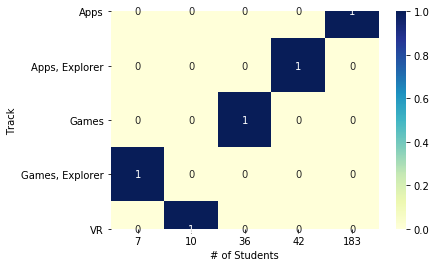

In [276]:
data = {'# of Students': [183, 42, 10, 36, 7], 
        'Track': ['Apps', 'Apps, Explorer', 'VR', 'Games', 'Games, Explorer']
       } 

new_df = pd.DataFrame(data) 

sns.heatmap(pd.crosstab(new_df['Track'], new_df['# of Students'], normalize='index'), cmap='YlGnBu', annot=True)

## From this information we can see that the most popular track was the 'Apps' track.

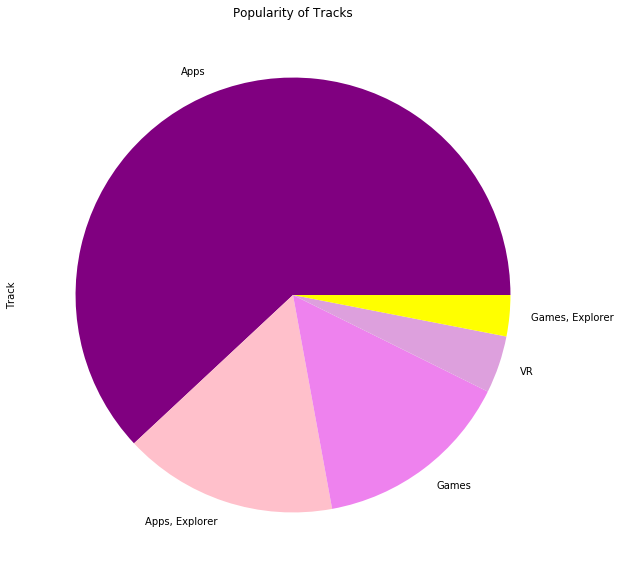

In [298]:
plt.title('Popularity of Tracks')

df['Track'].value_counts().plot(kind='pie', figsize = (20, 10), colors=['purple', 'pink', 'violet', 'plum', 'yellow'])

# Let's see the total number of students present per week:

In [103]:
df['Week'].dropna().value_counts()

Week 1    288
Week 2    277
Week 3    243
Week 4    193
Week 5    179
Week 6    144
Week 7    120
Week 8      9
Name: Week, dtype: int64

## We see that as the weeks go by, the number of student attendance decreases

# Let's break down this information so we can see how many students in each track were present each week:

In [147]:
table = pd.crosstab(df['Track'], df['Week'])
table

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Track,,,,,,,,
Apps,183,176,142,105,101,88,72,4
"Apps, Explorer",42,40,38,34,31,23,16,0
Games,35,29,36,33,31,21,19,4
"Games, Explorer",6,6,7,7,6,6,5,0
VR,10,10,10,10,7,5,7,1


## Gradually the overall attendance drops:

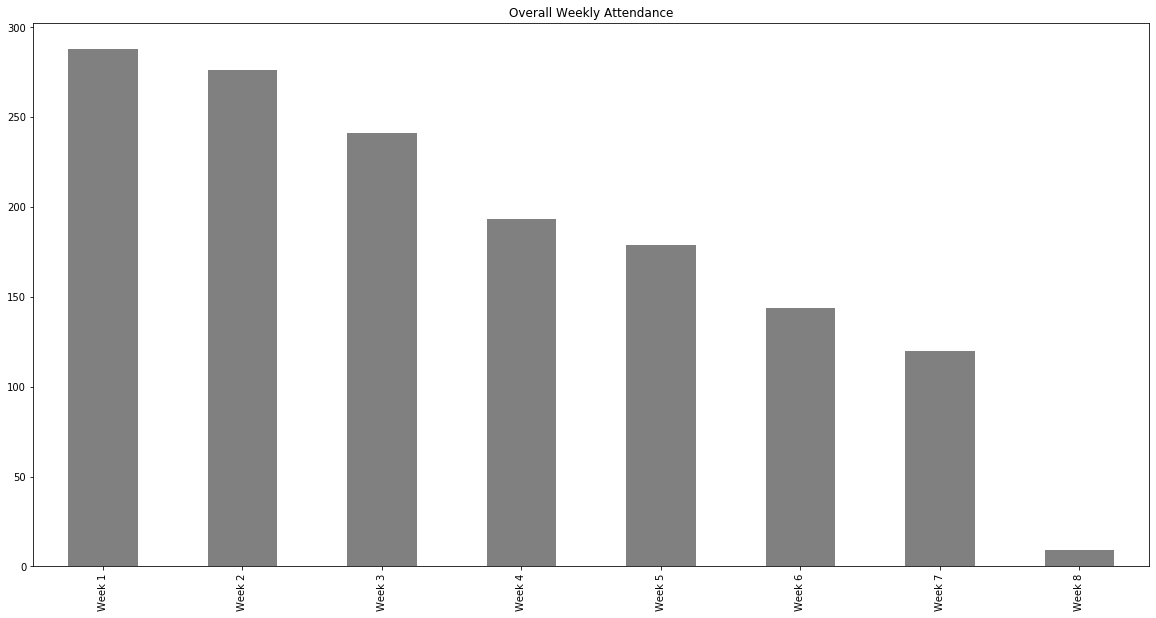

In [299]:
plt.title('Overall Weekly Attendance')
df['Week'].value_counts().plot(kind='bar', figsize=(20, 10), color='gray')

# Let's compare the attendance by week for each track:

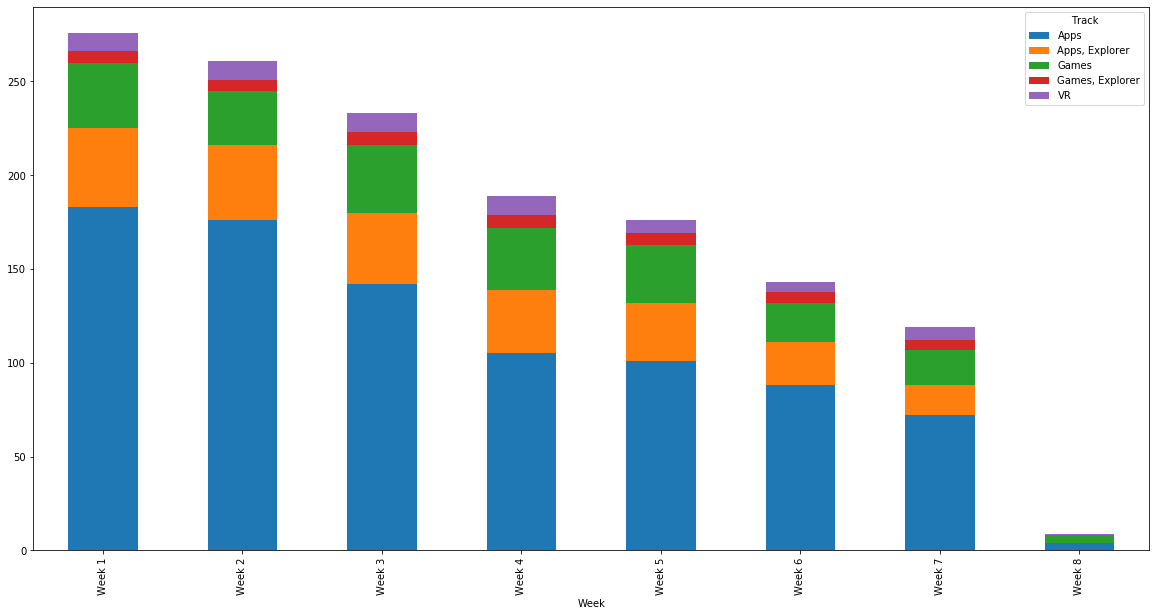

In [305]:
df.groupby(['Week'])['Track'].value_counts().unstack().plot(kind='bar',stacked=True, figsize=(20,10))

# Here's the attendance per week of each individual track:

## 1. Apps Track

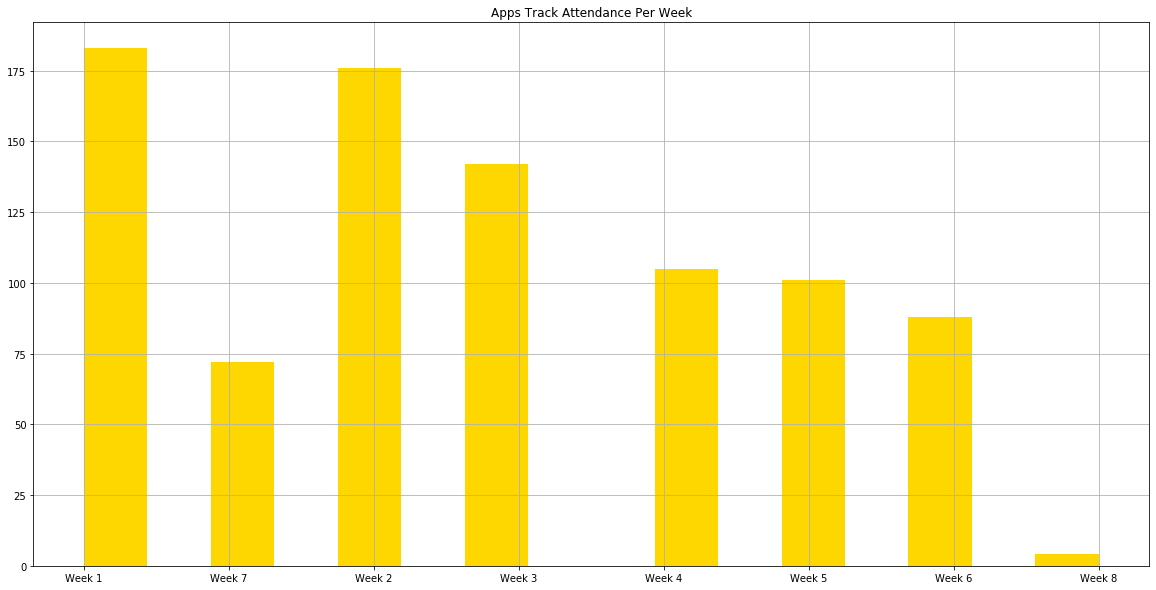

In [306]:
plt.title('Apps Track Attendance Per Week')
apps_track_rating = df[(df['Track'] == 'Apps') & (df['Rating (Num)'] >= '0')]
apps_track_rating['Week'].hist(bins = 16, color='gold', figsize=(20, 10))

## 2. Apps, Explorer Track

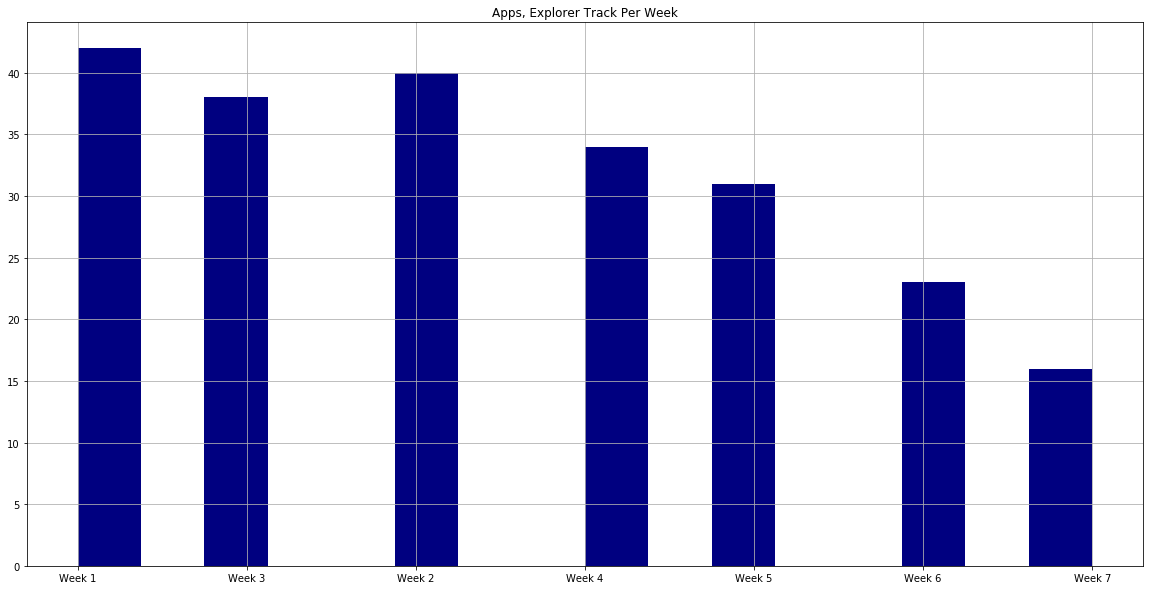

In [307]:
plt.title('Apps, Explorer Track Per Week')
apps_explorer_track_rating = df[(df['Track'] == 'Apps, Explorer') & (df['Rating (Num)'] >= '0')]
apps_explorer_track_rating['Week'].hist(bins = 16, color='navy', figsize=(20, 10))

## 3. VR Track

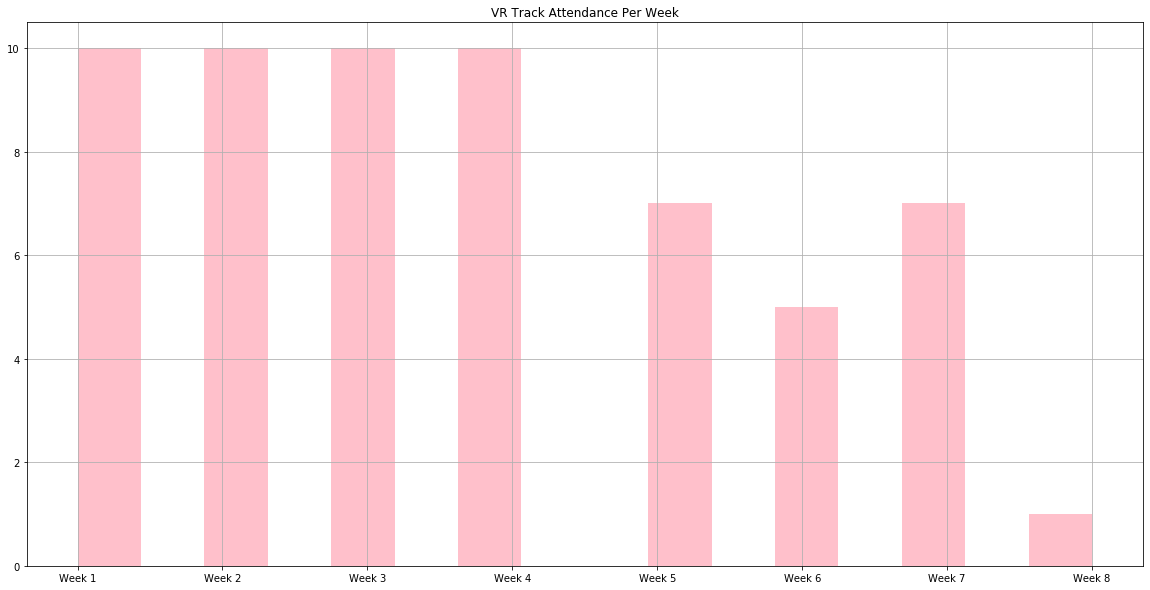

In [308]:
plt.title('VR Track Attendance Per Week')

vr_track_rating = df[(df['Track'] == 'VR') & (df['Rating (Num)'] >= '0')]
vr_track_rating['Week'].hist(bins = 16, color='pink', figsize=(20, 10))

## 4. Games Track

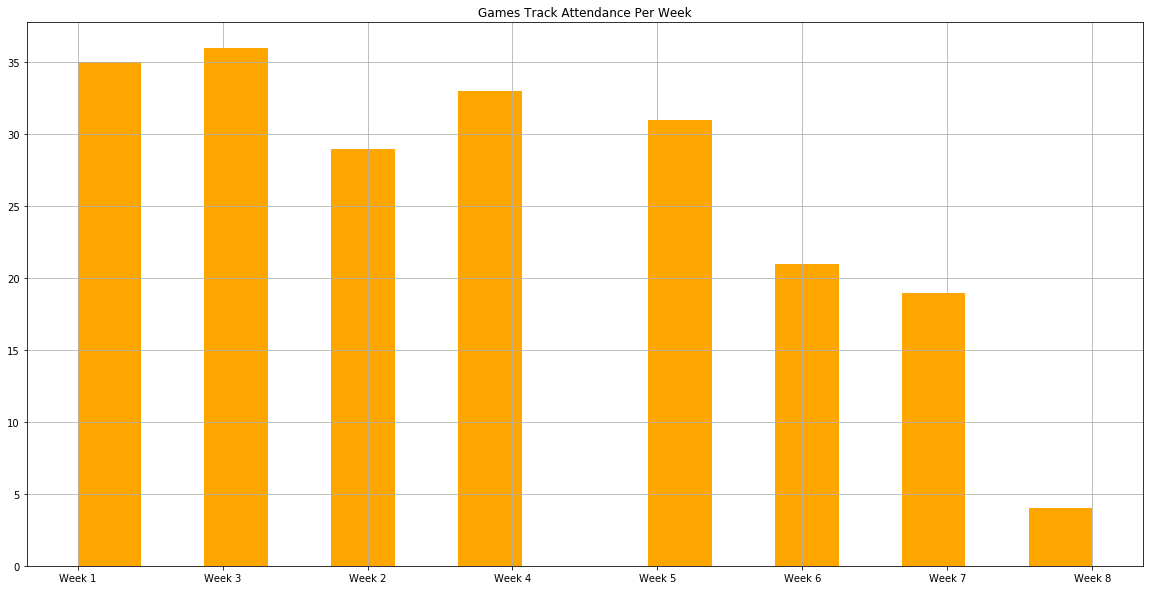

In [309]:
plt.title('Games Track Attendance Per Week')

games_track_rating = df[(df['Track'] == 'Games') & (df['Rating (Num)'] >= '0')]
games_track_rating['Week'].hist(bins = 16, color='orange', figsize=(20, 10))

## 5. Games, Explorer Track
### Notice that there is an increase at week 3 in attendance and there is no attendance for week 8

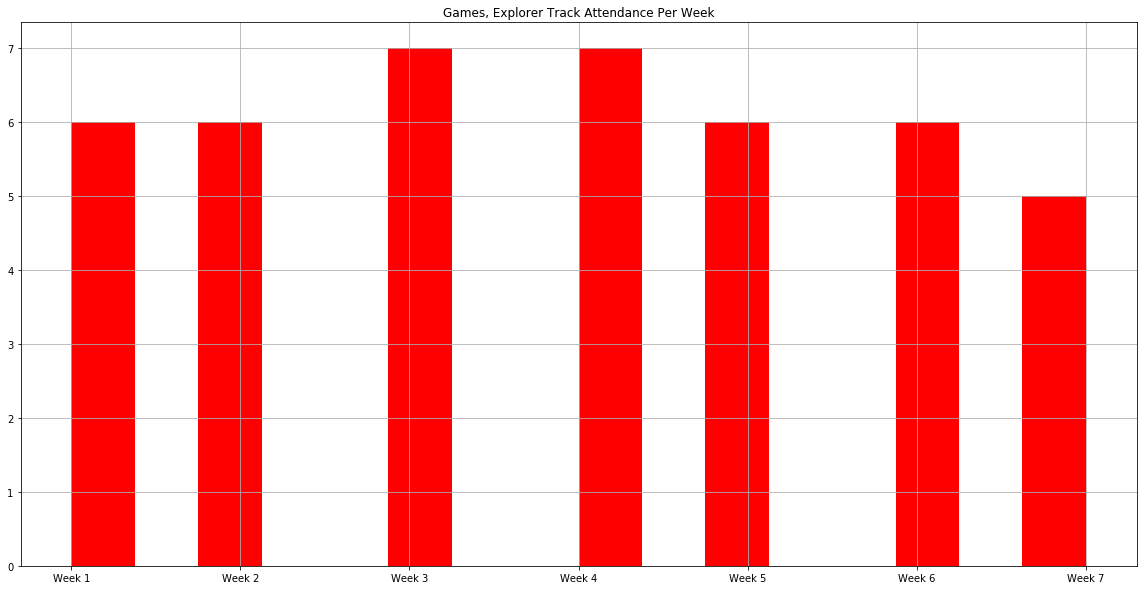

In [310]:
plt.title('Games, Explorer Track Attendance Per Week')

games_explorer_track_rating = df[(df['Track'] == 'Games, Explorer') & (df['Rating (Num)'] >= '0')]
games_explorer_track_rating['Week'].hist(bins = 16, color='red', figsize=(20, 10))

# Missing data...
> - Age of students
> - Gender ratio
> - Pass vs Fail 

# Summary: 
> - Each week, the overal attendance or responses dropped
> - The Apps Track had the most number of students
> - The VR Track had the least number of students
> - NYC had the most number of students
> - Hong Kong had the least number of students
